In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

<h1> Data Cleaning

Cast the Sex types into Three Indicator Variables.

Label ring with cutoff 9.

In [2]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv('abalone.csv', names = cols)
df = df.join(pd.get_dummies(df['Sex'], prefix = 'Sex')).drop(columns = ['Sex'])

def label_ring(r):
    if r >= 9:
        return 1
    else:
        return -1

df['Rings_label'] = df['Rings'].apply(lambda x: label_ring(x))

col_order_2 = ['Rings_label','Sex_-1','Sex_0','Sex_1', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
df =  df[col_order_2]
display(df.head())

,Rings_label,Sex_-1,Sex_0,Sex_1,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,-1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,-1,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


<h1> Train Test Split

Split by index location 3133

In [3]:
X_train = df.iloc[:3133, 1:].values
y_train = df.iloc[:3133,0].values

X_test  = df.iloc[3133:, 1:].values
y_test  = df.iloc[3133:, 0].values

X = df.iloc[:,1:].values
y = df.iloc[:, 0].values

<h1> GradientBoostingClassifier Package 

Test T in range (100, 10000) with increment of 100.

Conduct Cross Validation on each Boosting model with 10-fold.

In [4]:
adaScore = np.zeros(10)
for i in range(10):
    
    adaBoost = GradientBoostingClassifier(loss = 'exponential', n_estimators = 100*(1+i), max_depth = 1, random_state=0)
    adaBoost.fit(X_train, y_train)
    
    results  = cross_validate(adaBoost, X, y, cv=10)
    adaScore[i] = results['test_score'].mean()
    print('models completed: ' + str(i+1))

models completed: 1
models completed: 2
models completed: 3
models completed: 4
models completed: 5
models completed: 6
models completed: 7
models completed: 8
models completed: 9
models completed: 10


In [5]:
logitScore = np.zeros(10)

for i in range(10):
    logitBoost = GradientBoostingClassifier(loss = 'deviance', n_estimators = 100*(1+i) , max_depth = 1, random_state=0)
    logitBoost.fit(X_train, y_train)
    
    results = cross_validate(logitBoost, X, y, cv=10)
    logitScore[i] = results['test_score'].mean()
    print('models completed: ' + str(i+1))

models completed: 1
models completed: 2
models completed: 3
models completed: 4
models completed: 5
models completed: 6
models completed: 7
models completed: 8
models completed: 9
models completed: 10


<h1> Plot a Graph to Compare

In [6]:
T_list = [(i+1)*100 for i in range(10)]
T_list

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

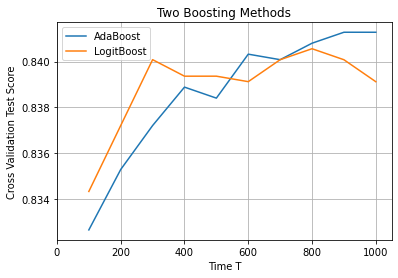

In [9]:
plt.plot(T_list, adaScore, label = 'AdaBoost')
plt.plot(T_list, logitScore, label = 'LogitBoost')
plt.legend()
plt.title('Two Boosting Methods')
plt.xlabel('Time T')
plt.ylabel('Cross Validation Test Score')
plt.xlim(0,1050,100)
plt.grid()
plt.show()

comments: From the graph we can see that, the performance of Logit Boost seems more stable in the range of T = [400, 1000],
while the AdaBoost method keeps growing its accuracy